<a href="https://colab.research.google.com/github/Coder-Wasim/Learning/blob/main/Learning_5_Data_Preprocessing_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# pip install category_encoders
# import category_encoders as ce


import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning/Part 0.1 - Learning/bigmart.csv')
df.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
#Selecting the Object dattype  & deleting ireelevent columns
df_object = df.select_dtypes('object')
df_object.drop(['Item_Identifier','Outlet_Identifier'],axis = 1 , inplace= True)
df_object.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Item_Fat_Content      8523 non-null   object
 1   Item_Type             8523 non-null   object
 2   Outlet_Size           6113 non-null   object
 3   Outlet_Location_Type  8523 non-null   object
 4   Outlet_Type           8523 non-null   object
dtypes: object(5)
memory usage: 333.1+ KB


In [ ]:
df_object.head(3)

,Item_Fat_Content,Item_Type,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,Low Fat,Dairy,Medium,Tier 1,Supermarket Type1
1,Regular,Soft Drinks,Medium,Tier 3,Supermarket Type2
2,Low Fat,Meat,Medium,Tier 1,Supermarket Type1


#*1 Encoding Categorical column

##1 - Label Encoder
''''
Label encoding is used when the categorical feature is ordinal (e.g. Jr. kg, Sr. kg, Primary school, high school, etc) or
when you can come up with a label encoder that assigns close labels to similar categories
It can also be used when the number of categories is quite large as one-hot encoding can lead to high memory consumption.

LabelEncoder class, the categories are sorted in alphabetical order and then assigned numerical values starting from 0.
For example, if you have a feature with three categories: “red”, “blue”, and “green”, LabelEncoder would assign the values 0, 1, and 2
to these categories respectively, since “blue” comes first alphabetically, followed by “green” and then “red”.

'''

In [ ]:
df_object['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [ ]:
#from sklearn.preprocessing import LabelEncoder
# Initialize the LabelEncoder
le = LabelEncoder()

# Fit & Transform the encoder to the data
df_object['Outlet_Location_Type'] = le.fit_transform(df_object['Outlet_Location_Type'])
df_object['Outlet_Location_Type'].value_counts()

2    3350
1    2785
0    2388
Name: Outlet_Location_Type, dtype: int64

In [ ]:
# Fit & Transform the encoder to the data
df_object['Outlet_Type'] = le.fit_transform(df_object['Outlet_Type'])
df_object['Outlet_Type'].value_counts()

1    5577
0    1083
3     935
2     928
Name: Outlet_Type, dtype: int64

##2 - Manual Feature Mapping

In [ ]:
#filling the missing data
df_object['Outlet_Size'].value_counts().index[0] #finding the maximum value

'Medium'

In [ ]:
df_object['Outlet_Size'].fillna(df_object['Outlet_Size'].value_counts().index[0],inplace = True)
df_object.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Item_Identifier       8523 non-null   object
 1   Item_Fat_Content      8523 non-null   object
 2   Item_Type             8523 non-null   object
 3   Outlet_Identifier     8523 non-null   object
 4   Outlet_Size           8523 non-null   object
 5   Outlet_Location_Type  8523 non-null   object
 6   Outlet_Type           8523 non-null   object
dtypes: object(7)
memory usage: 466.2+ KB


In [ ]:
df_object['Outlet_Size'].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [ ]:
df_object['Outlet_Size'] = df_object['Outlet_Size'].map({'High' : 0 , 'Medium' : 1 , 'Small' : 2})

''''
or
df_object['Outlet_Size'] = df_object['Outlet_Size'].replace(["High","Medium","Small"],[0,1,2] )
'''
df_object['Outlet_Size'].value_counts()

1    5203
2    2388
0     932
Name: Outlet_Size, dtype: int64

##3 - One Hot Encoder

One-hot encoding can be useful when the order of the categories does not matter and when the number of categories is not too large, as it can lead to a large increase in the number of columns in the dataset.

One-hot encoding can be used with any number of categories, but it can lead to a large increase in the number of columns in the dataset when the number of categories is large. This can result in high memory consumption and longer training times for machine learning models.

As a rule of thumb, one-hot encoding is typically used when the number of categories is not too large (e.g. less than 10-15). However, this is not a strict rule and the decision to use one-hot encoding should be based on the specific use case and the nature of the data.

If the number of categories is very large, other encoding methods such as <b><u>binary encoding or target encoding may be more appropriate</b></u>. These methods can represent categorical data with fewer columns than one-hot encoding, but they may have other trade-offs.



###3.1 - Get Dummy

In [ ]:
dummy = pd.get_dummies(df['Item_Fat_Content'])
dummy

,LF,Low Fat,Regular,low fat,reg
0,0,1,0,0,0
1,0,0,1,0,0
2,0,1,0,0,0
3,0,0,1,0,0
4,0,1,0,0,0
...,...,...,...,...,...
8518,0,1,0,0,0
8519,0,0,1,0,0
8520,0,1,0,0,0
8521,0,0,1,0,0


In [ ]:
df_object.join(dummy)

,Item_Fat_Content,Item_Type,Outlet_Size,Outlet_Location_Type,Outlet_Type,LF,Low Fat,Regular,low fat,reg
0,Low Fat,Dairy,Medium,Tier 1,Supermarket Type1,0,1,0,0,0
1,Regular,Soft Drinks,Medium,Tier 3,Supermarket Type2,0,0,1,0,0
2,Low Fat,Meat,Medium,Tier 1,Supermarket Type1,0,1,0,0,0
3,Regular,Fruits and Vegetables,NaN,Tier 3,Grocery Store,0,0,1,0,0
4,Low Fat,Household,High,Tier 3,Supermarket Type1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
8518,Low Fat,Snack Foods,High,Tier 3,Supermarket Type1,0,1,0,0,0
8519,Regular,Baking Goods,NaN,Tier 2,Supermarket Type1,0,0,1,0,0
8520,Low Fat,Health and Hygiene,Small,Tier 2,Supermarket Type1,0,1,0,0,0
8521,Regular,Snack Foods,Medium,Tier 3,Supermarket Type2,0,0,1,0,0


In [ ]:
#deleting old column Item_Identifier
df_object.drop("Item_Fat_Content",inplace= True,axis = 1)

###3.2 -  Sklearn One-Hot Encoder

In [ ]:
#from sklearn.preprocessing import OneHotEncoder

# Initialize the OneHotEncoder
encoder = OneHotEncoder()

# Fit the encoder to the data
encoder.fit(df[['Item_Fat_Content']])

# Transform the data
encoded_data = encoder.transform(df[['Item_Fat_Content']])

# Convert the result to a data frame and add column names
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(['Item_Fat_Content']))

# Concatenate the original data frame with the encoded data frame
result_df = pd.concat([df, encoded_df], axis=1)

result_df



,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,0.0,1.0,0.0,0.0,0.0
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,0.0,0.0,1.0,0.0,0.0
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,0.0,1.0,0.0,0.0,0.0
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,0.0,0.0,1.0,0.0,0.0
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,0.0,1.0,0.0,0.0,0.0
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850,0.0,0.0,1.0,0.0,0.0
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,0.0,1.0,0.0,0.0,0.0
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,0.0,0.0,1.0,0.0,0.0


### Sklearn vs Get Dummy ()


Column names: OneHotEncoder does not generate column names for the encoded data, while get_dummies generates descriptive column names based on the original column name and the category values.

Handling unknown categories: OneHotEncoder can handle unknown categories (i.e. categories that were not present in the training data) by either raising an error or ignoring them, depending on the value of the handle_unknown parameter. get_dummies, on the other hand, does not have an option to handle unknown categories and will always raise an error if it encounters one.

-------------------------------------

OneHotEncoder might be a better choice when:

<li>You are working with a scikit-learn pipeline and want to use the output of other transformers as input to the encoder.
<li>You need to handle unknown categories during the encoding process.
<li>You are working with large datasets and want to use sparse matrices to save memory.

get_dummies might be a better choice when:

<li>You are working with pandas DataFrames and want to encode one or more columns directly.
<li>You want to generate descriptive column names for the encoded data.
<li>You prefer to work with dense DataFrames rather than sparse matrices.

In summary, OneHotEncoder is more convenient when working with scikit-learn pipelines and large datasets, while get_dummies is more convenient when working with pandas DataFrames.



##4 - Binary Encoder

one-hot encoding creates more columns than binary encoding but represents each category with a single column. Binary encoding creates fewer columns but represents each category with multiple columns

-------------------------------

example, if a categorical variable has four categories ‘A’, ‘B’, ‘C’, and ‘D’, binary encoding would assign integer values 0, 1, 2, and 3 to these categories respectively. These integers would then be converted to binary: 00 for 0, 01 for 1, 10 for 2, and 11 for 3. Finally, these binary representations would be split into two separate columns, one for the first digit and one for the second digit.

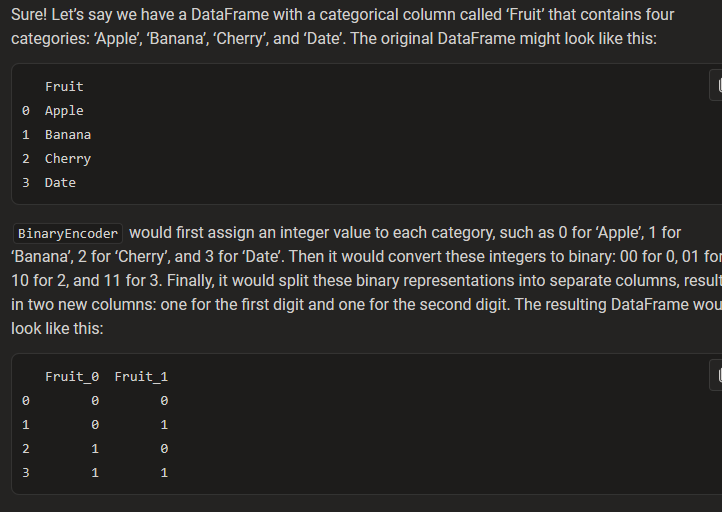

In [ ]:
# import category_encoders as ce

encoder = ce.BinaryEncoder()
df_encoded = encoder.fit_transform(df_object['Item_Type'])
df_encoded

,Item_Type_0,Item_Type_1,Item_Type_2,Item_Type_3,Item_Type_4
0,0,0,0,0,1
1,0,0,0,1,0
2,0,0,0,1,1
3,0,0,1,0,0
4,0,0,1,0,1
...,...,...,...,...,...
8518,0,0,1,1,1
8519,0,0,1,1,0
8520,0,1,0,1,0
8521,0,0,1,1,1


In [ ]:
df_object.join(df_encoded)

,Item_Fat_Content,Item_Type,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_0,Item_Type_1,Item_Type_2,Item_Type_3,Item_Type_4
0,Low Fat,Dairy,Medium,Tier 1,Supermarket Type1,0,0,0,0,1
1,Regular,Soft Drinks,Medium,Tier 3,Supermarket Type2,0,0,0,1,0
2,Low Fat,Meat,Medium,Tier 1,Supermarket Type1,0,0,0,1,1
3,Regular,Fruits and Vegetables,NaN,Tier 3,Grocery Store,0,0,1,0,0
4,Low Fat,Household,High,Tier 3,Supermarket Type1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
8518,Low Fat,Snack Foods,High,Tier 3,Supermarket Type1,0,0,1,1,1
8519,Regular,Baking Goods,NaN,Tier 2,Supermarket Type1,0,0,1,1,0
8520,Low Fat,Health and Hygiene,Small,Tier 2,Supermarket Type1,0,1,0,1,0
8521,Regular,Snack Foods,Medium,Tier 3,Supermarket Type2,0,0,1,1,1


### one hot encoding vs Binary encoding

hot encoding creates more columns than binary encoding but represents each category with a single column.
Binary encoding creates fewer columns but represents each category with multiple columns.


-------------------------------------------

One-hot encoding has some benefits over binary encoding in certain situations. Here are a few potential benefits of using one-hot encoding:

Interpretability: One-hot encoding creates a new binary column for each unique category in the categorical variable, with each column representing a single category. This makes the encoded data more interpretable, as it is easy to see which category each row belongs to by looking at the value of the binary columns.

Linear separability: One-hot encoding can improve the linear separability of the data, which can be beneficial for linear models such as logistic regression. Since each category is represented by a separate column, linear models can learn weights for each category independently.

No ordinal relationship: One-hot encoding does not impose any ordinal relationship between the categories, as each category is represented by a separate column. This can be beneficial for categorical variables where the categories do not have an inherent order.



##5 -  BaseN Encoder (reduce more columns than binary encoding)

In [ ]:
encoded = ce.BaseNEncoder(cols=['Item_Type'],base = 4) #'keeping base = 2 will acts as an binary encoding'
df_encoded = encoded.fit_transform(df['Item_Type'])

In [ ]:
df_object.join(df_encoded)


,Item_Fat_Content,Item_Type,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_0,Item_Type_1,Item_Type_2
0,Low Fat,Dairy,Medium,Tier 1,Supermarket Type1,0,0,1
1,Regular,Soft Drinks,Medium,Tier 3,Supermarket Type2,0,0,2
2,Low Fat,Meat,Medium,Tier 1,Supermarket Type1,0,0,3
3,Regular,Fruits and Vegetables,NaN,Tier 3,Grocery Store,0,1,0
4,Low Fat,Household,High,Tier 3,Supermarket Type1,0,1,1
...,...,...,...,...,...,...,...,...
8518,Low Fat,Snack Foods,High,Tier 3,Supermarket Type1,0,1,3
8519,Regular,Baking Goods,NaN,Tier 2,Supermarket Type1,0,1,2
8520,Low Fat,Health and Hygiene,Small,Tier 2,Supermarket Type1,0,2,2
8521,Regular,Snack Foods,Medium,Tier 3,Supermarket Type2,0,1,3


##6 - Target Encoding (Mean & Frequncy Encoding)

Target encoding can be useful when dealing with high cardinality categorical variables(unique values or categories in a variable)

-----------------------
Drawbacks

Data leakage: Naively applying target encoding can allow data leakage, where information from the target variable is leaked into the features 1. This can lead to overly optimistic performance estimates during model evaluation and poor predictive performance on new data.

Sensitivity to outliers: Target encoding is based on the mean of the target variable for each category, which can be sensitive to outliers. If there are extreme values in the target variable for a particular category, it can affect the encoded value for that category and potentially lead to poor predictive performance.

In [ ]:
df.head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138


In [ ]:
df_mean = df['Item_Outlet_Sales'].groupby(df['Item_Type']).agg('mean').to_frame()
df_mean

,Item_Outlet_Sales
Item_Type,
Baking Goods,1952.971207
Breads,2204.132226
Breakfast,2111.808651
Canned,2225.194904
Dairy,2232.542597
Frozen Foods,2132.867744
Fruits and Vegetables,2289.009592
Hard Drinks,2139.221622
Health and Hygiene,2010.000265


In [ ]:
pd.merge(df,df_mean,how= "inner",left_on= "Item_Type",right_on="Item_Type")

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales_x,Item_Outlet_Sales_y
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,2232.542597
1,FDA03,18.500,Regular,0.045464,Dairy,144.1102,OUT046,1997,Small,Tier 1,Supermarket Type1,2187.1530,2232.542597
2,FDU02,13.350,Low Fat,0.102492,Dairy,230.5352,OUT035,2004,Small,Tier 2,Supermarket Type1,2748.4224,2232.542597
3,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344,2232.542597
4,FDV38,19.250,Low Fat,0.170349,Dairy,55.7956,OUT010,1998,NaN,Tier 3,Grocery Store,163.7868,2232.542597
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF33,7.970,Low Fat,0.021579,Seafood,105.9596,OUT045,2002,NaN,Tier 2,Supermarket Type1,2049.3324,2326.065928
8519,FDI57,19.850,Low Fat,0.054246,Seafood,196.0768,OUT018,2009,Medium,Tier 3,Supermarket Type2,5518.1504,2326.065928
8520,FDG21,17.350,Regular,0.000000,Seafood,150.2050,OUT045,2002,NaN,Tier 2,Supermarket Type1,5992.2000,2326.065928
8521,FDJ57,7.420,Regular,0.021662,Seafood,187.7582,OUT018,2009,Medium,Tier 3,Supermarket Type2,2600.6148,2326.065928


##7 -  Summary

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning/Part xx1 - Project/Data Preprocessing/bigmart.csv')
df_object = df.select_dtypes('object') #selectying the object DT
df_object.drop(['Item_Identifier','Outlet_Identifier'],axis = 1 , inplace= True) #deleting identity columns

print(df_object)
print()

#label encoder - since values is in sorted manner
le = LabelEncoder()
df_object['Outlet_Location_Type'] = le.fit_transform(df_object['Outlet_Location_Type'])
df_object['Outlet_Type'] = le.fit_transform(df_object['Outlet_Type'])

#manual encodig -
df_object['Outlet_Size'].fillna(df_object['Outlet_Size'].value_counts().index[0],inplace = True)
df_object['Outlet_Size'] = df_object['Outlet_Size'].map({'High' : 0 , 'Medium' : 1 , 'Small' : 2})

#OHE (skleran)
# Initialize the OneHotEncoder
encoder = OneHotEncoder()
# Fit the encoder to the data
encoder.fit(df_object[['Item_Fat_Content']])
# Transform the data
encoded_data = encoder.transform(df_object[['Item_Fat_Content']])
# Convert the result to a data frame and add column names
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(['Item_Fat_Content']))
# Concatenate the original data frame with the encoded data frame
df_object = pd.concat([df_object, encoded_df], axis=1)


# Binary Encoding
encoded = ce.BaseNEncoder(cols=['Item_Type'],base = 4) #'keeping base = 2 will acts as an binary encoding'
df_encoded = encoded.fit_transform(df['Item_Type'])
df_object = df_object.join(df_encoded)
df_object.drop('Item_Type',axis = 1 , inplace = True)
df_object

     Item_Fat_Content              Item_Type Outlet_Size Outlet_Location_Type  \
0             Low Fat                  Dairy      Medium               Tier 1   
1             Regular            Soft Drinks      Medium               Tier 3   
2             Low Fat                   Meat      Medium               Tier 1   
3             Regular  Fruits and Vegetables         NaN               Tier 3   
4             Low Fat              Household        High               Tier 3   
...               ...                    ...         ...                  ...   
8518          Low Fat            Snack Foods        High               Tier 3   
8519          Regular           Baking Goods         NaN               Tier 2   
8520          Low Fat     Health and Hygiene       Small               Tier 2   
8521          Regular            Snack Foods      Medium               Tier 3   
8522          Low Fat            Soft Drinks       Small               Tier 1   

            Outlet_Type  
0

,Item_Fat_Content,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_0,Item_Type_1,Item_Type_2
0,Low Fat,1,0,1,0.0,1.0,0.0,0.0,0.0,0,0,1
1,Regular,1,2,2,0.0,0.0,1.0,0.0,0.0,0,0,2
2,Low Fat,1,0,1,0.0,1.0,0.0,0.0,0.0,0,0,3
3,Regular,1,2,0,0.0,0.0,1.0,0.0,0.0,0,1,0
4,Low Fat,0,2,1,0.0,1.0,0.0,0.0,0.0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,Low Fat,0,2,1,0.0,1.0,0.0,0.0,0.0,0,1,3
8519,Regular,1,1,1,0.0,0.0,1.0,0.0,0.0,0,1,2
8520,Low Fat,2,1,1,0.0,1.0,0.0,0.0,0.0,0,2,2
8521,Regular,1,2,2,0.0,0.0,1.0,0.0,0.0,0,1,3


#*2 Feature Scalling

Feature scaling is an important preprocessing step in machine learning that can help improve the performance of many algorithms.

There are several reasons why we perform feature scaling:

Algorithms sensitive to scale: Some machine learning algorithms, such as k-NN and k-means, are sensitive to the scale of the data. These algorithms compute the distance between data points, so if one feature has a much larger range than the others, it can dominate the distance calculation. Feature scaling can help prevent this by ensuring that all the features have a similar scale.

Faster convergence: Feature scaling can help the optimization algorithms used to train many machine learning models converge faster. This is because feature scaling ensures that all the features have a similar scale, which can prevent the optimization algorithm from oscillating back and forth in search of the optimal solution.

Improved model performance: Feature scaling can also help improve the performance of many machine learning models by preventing one or more features from dominating the others. For example, if one feature has a much larger range than the others, it may have a disproportionate impact on the model’s predictions. Feature scaling can help prevent this by ensuring that all the features have a similar scale.

Regularization: Many machine learning models include a regularization term to prevent overfitting. Regularization works by adding a penalty to the loss function that encourages the model to have small weights. Feature scaling can help ensure that the regularization term affects all the features equally, which can improve the performance of the model.

OR

simpler terms. Imagine you have a dataset with two features: height and weight. Height is measured in meters and weight is measured in kilograms. Now, the range of height values might be from 1.5 to 2 meters, while the range of weight values might be from 50 to 100 kilograms. This means that the weight values are much larger than the height values.

If you use this dataset to train a machine learning model without scaling the features, the model will be influenced more by the weight values because they are larger. This can lead to a less accurate model.

To prevent this, we can use feature scaling to transform the values of both features to a similar scale. For example, we can scale both features to have values between 0 and 1. This way, both features will contribute equally to the model and we can get a more accurate result.


-----------------------

Standardization vs Normalization

The choice between normalization and standardization can also depend on the specific machine learning algorithm being used. Some algorithms, such as k-NN and k-means, are sensitive to the scale of the data and may perform better with normalized data. Other algorithms, such as linear regression and logistic regression, may perform better with standardized data.

-------
Here are some benefits of normalization over standardization:

Simplicity: Normalization is a simpler technique than standardization. It involves scaling the data to have values between a desired range, such as [0, 1] or [-1, 1]. This can be done easily by subtracting the minimum value of the feature and then dividing by the range of the feature.

Preserves the shape of the data: Normalization preserves the shape of the data distribution. This means that if the data has a skewed or non-normal distribution, normalization will not change the shape of the distribution. This can be useful in some situations where we want to preserve the shape of the data.

Bound range: Normalization scales the data to have values within a specific range, such as [0, 1] or [-1, 1]. This can be useful in some situations where we want to ensure that the scaled data has a specific range. For example, some machine learning algorithms, such as neural networks, may perform better when the input data has values within a specific range.

-----------------------

Here are some benefits of standardization over normalization:

Less sensitive to outliers: Standardization is less sensitive to outliers than normalization. This is because standardization scales the data based on the mean and standard deviation of the feature, while normalization scales the data based on the minimum and maximum values of the feature. If there are outliers present in the data, they can significantly affect the minimum and maximum values, which in turn affects the scaling of all the other values when using normalization. Standardization, on the other hand, is less affected by outliers because the mean and standard deviation are less sensitive to extreme values.

Suitable for Gaussian data: Standardization can be more suitable for data that follows a Gaussian distribution. This is because standardization transforms the data so that it has a mean of zero and a standard deviation of 1, which are the properties of a standard normal distribution. If the data follows a Gaussian distribution, standardizing it can help improve the performance of some machine learning algorithms.

Regularization: Many machine learning models include a regularization term to prevent overfitting. Regularization works by adding a penalty to the loss function that encourages the model to have small weights. Standardization can help ensure that the regularization term affects all the features equally, which can improve the performance of the model.





##2.1Standardization

In [ ]:
#formula
Xstd = (X - mean) / std

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test= sc.transform(X_test)

##2.2Normalization

In [ ]:
#formula
Xnorm = (X - Xmin) / (Xmax - Xmin)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to the data
scaler.fit(data)
# Transform the data
normalized_data = scaler.transform(data)

#*3 Skewness

skewed data occurs when the distribution of a variable is not evenly distributed, resulting in an unbalanced data set. This can negatively affect the performance of machine learning algorithms because they cannot learn patterns from data effectively. For example, imagine you have a dataset with 1000 samples, where 950 samples belong to class A and only 50 samples belong to class B. A machine learning algorithm trained on this dataset will likely learn to predict class A very well, but may struggle to accurately predict class B because there are so few examples of it. This is why skewed data can be problematic for machine learning algorithms

## Sqrt & Cube Root

In [ ]:
# df['Item_Outlet_Sales'] = np.sqrt([df['Item_Outlet_Sales']])
np.sqrt([df['Item_Outlet_Sales']])

array([[61.11577538, 21.0576067 , 45.79596052, ..., 34.54147652,
        42.96041899, 27.67074267]])

In [ ]:
# df['Item_Outlet_Sales'] = np.cbrt([df['Item_Outlet_Sales']])
np.cbrt([df['Item_Outlet_Sales']])

array([[15.51561105,  7.62557634, 12.80024007, ..., 10.60621921,
        12.26626489,  9.1484435 ]])

In [ ]:
np.log([df['Item_Outlet_Sales']])

array([[8.22554004, 6.09452372, 7.64839178, ..., 7.08432164, 7.52055841,
        6.64075127]])

# Scribble
------------------------------------------------------------------------------------------------------

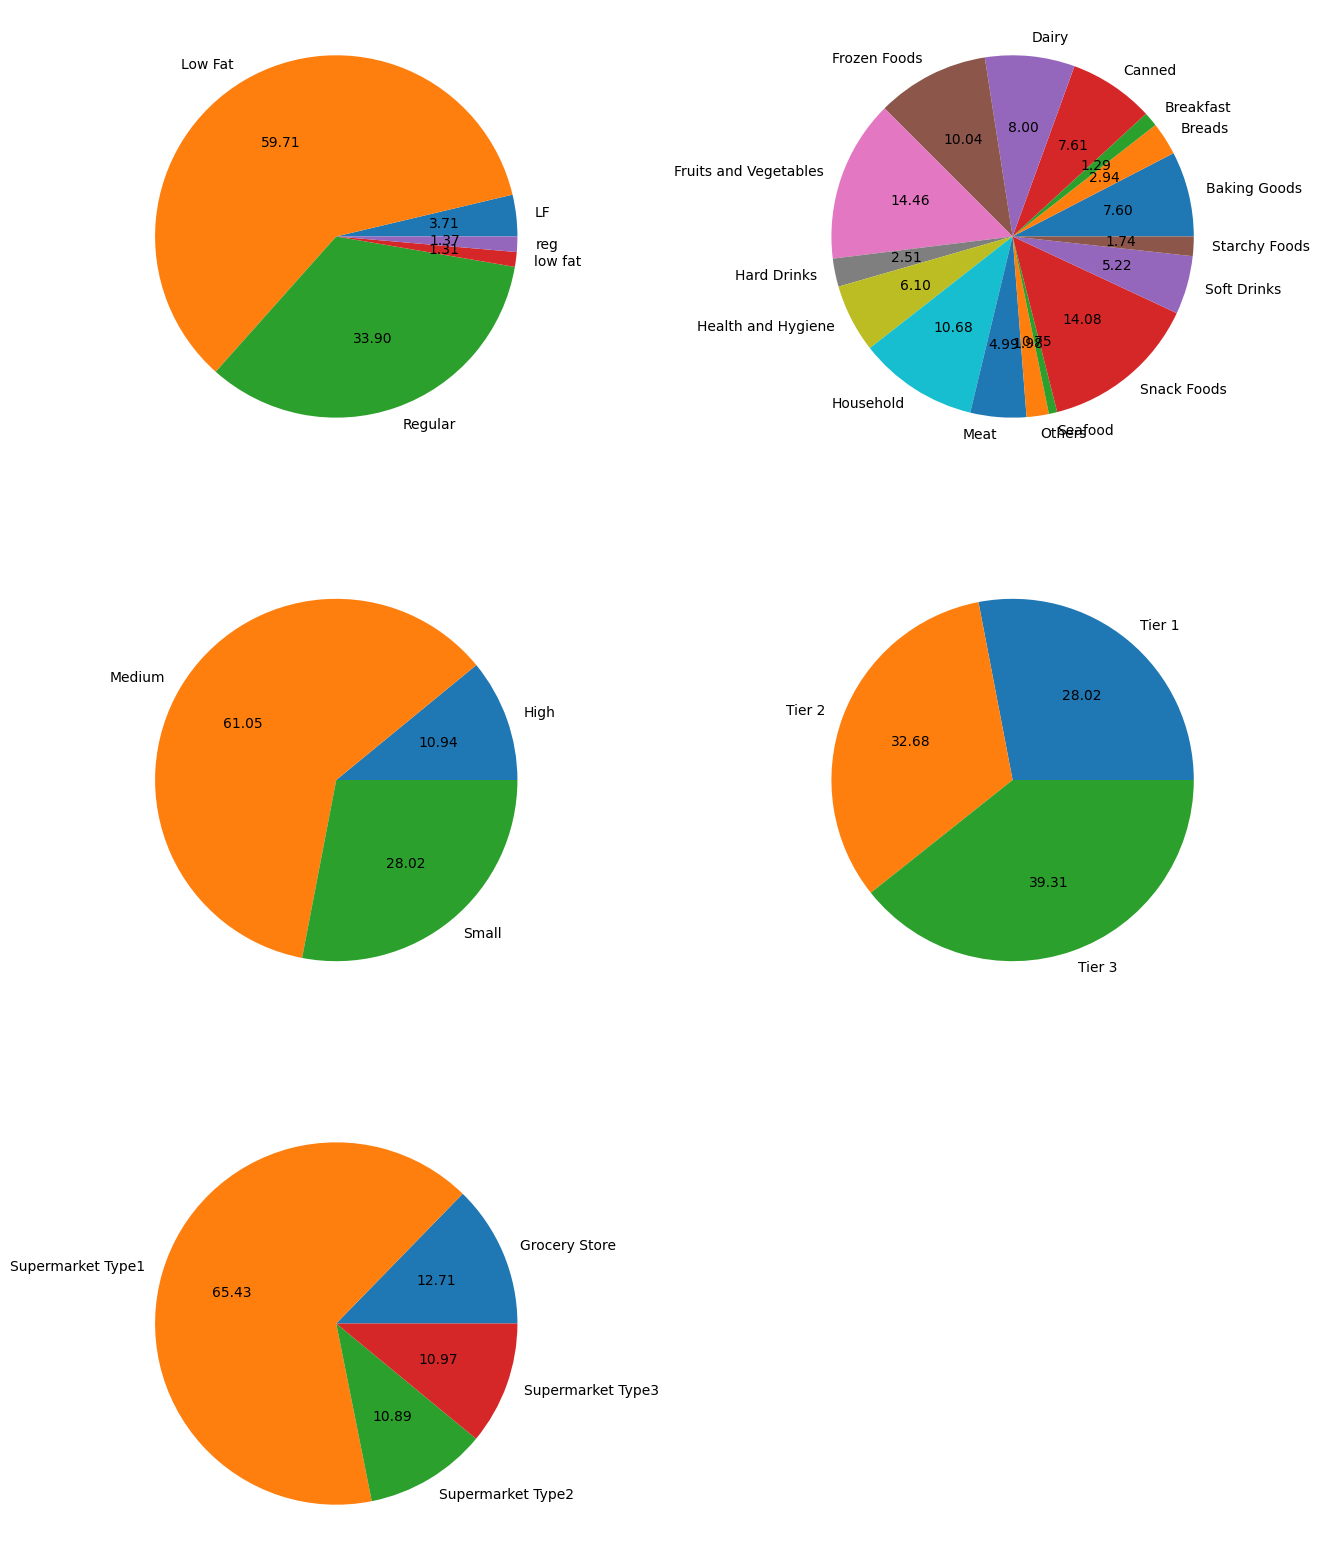

In [ ]:
# plt.subplots(figsize=(16,20))
# for i in df.columns:
#   if df[i].dtypes == 'float64' or  df[i].dtypes == 'int64':
#     plt.subplot(col_val,row_val,i2)
#     sns.histplot(df[i] ,kde = True)
#     i2 += 1

i2= 1
plt.subplots(figsize=(16,20))
for i in df_object.columns:
  plt.subplot(3,2,i2)
  df_object.groupby(i).size().plot(kind='pie', autopct='%.2f')
  i2 += 1

<Axes: >

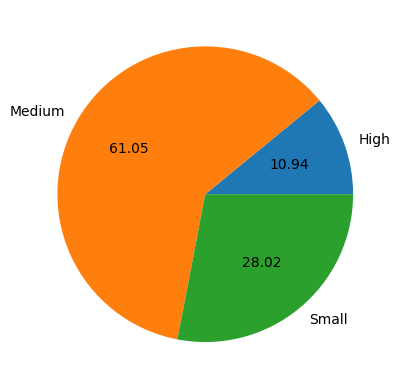

In [ ]:
df_object.groupby('Outlet_Size').size().plot(kind='pie', autopct='%.2f')

In [ ]:
pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 3.8 MB/s eta 0:00:00


<Axes: xlabel='Item_Outlet_Sales', ylabel='Count'>

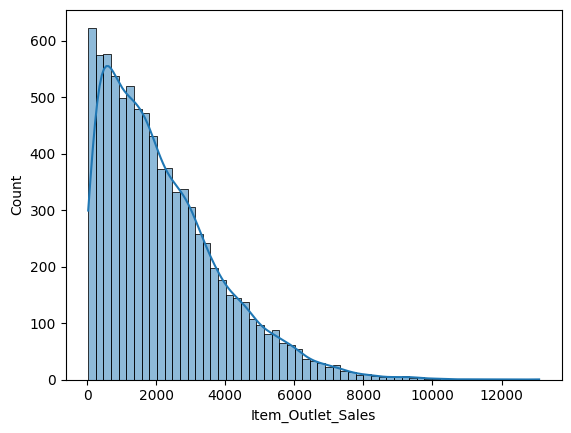

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

# Load the dataset
# df = pd.read_csv('house_prices.csv')

# Plot the original distribution of house prices
sns.histplot(df['Item_Outlet_Sales'], kde=True)


<Axes: xlabel='log_price', ylabel='Count'>

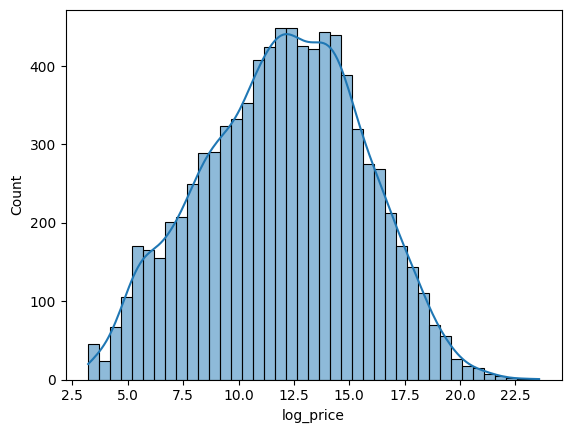

In [ ]:
df['log_price'] = np.cbrt(df['Item_Outlet_Sales'])

# Plot the transformed distribution of house prices
sns.histplot(df['log_price'], kde=True)


In [ ]:
import pandas as pd
import numpy as np

# Create sample data
data = {'Age': [20, 30, 40, 50, 60], 'Income': [30000, 40000, 50000, 60000, 170000]}
df = pd.DataFrame(data)

# Display the data
print(df)


   Age  Income
0   20   30000
1   30   40000
2   40   50000
3   50   60000
4   60  170000


<Axes: ylabel='Frequency'>

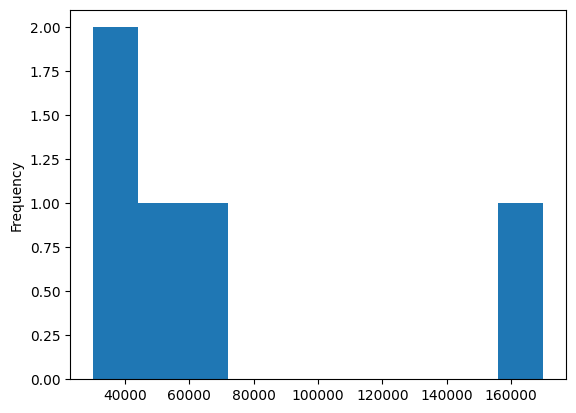

In [ ]:
df['Income'].plot.hist()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


# Create a MinMaxScaler object
# scaler = MinMaxScaler()
scaler = StandardScaler()

# Fit the scaler to the data
scaler.fit(df)

# Transform the data
scaled_data = scaler.transform(df)

# Create a new DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=['Age', 'Income'])

# Display the scaled data
print(scaled_df)


        Age    Income
0 -1.414214 -0.784465
1 -0.707107 -0.588348
2  0.000000 -0.392232
3  0.707107 -0.196116
4  1.414214  1.961161


<Axes: ylabel='Frequency'>

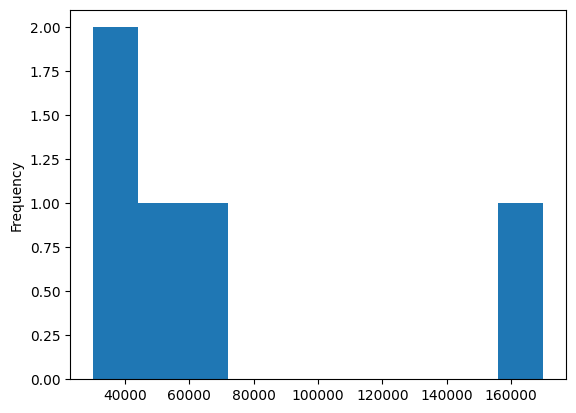

In [ ]:
df['Income'].plot.hist()

<Axes: ylabel='Frequency'>

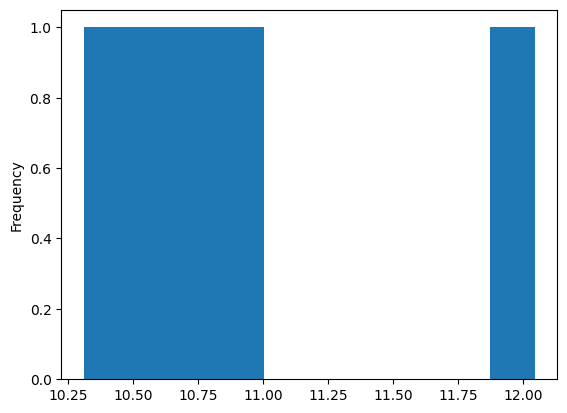

In [ ]:
# Apply log transformation to the Income feature
df['Income_log'] = np.log(df['Income'])

# Plot a histogram of the transformed Income feature
df['Income_log'].plot.hist()

In [ ]:
df['Income_log']

0    10.308953
1    10.596635
2    10.819778
3    11.002100
4    12.043554
Name: Income_log, dtype: float64